In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [5]:
df = pd.read_csv('Advertising Budget and Sales.csv')
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
print('Rows ---->',df.shape[0])
print('column --->',df.shape[1])

Rows ----> 200
column ---> 5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.dtypes

Unnamed: 0                   int64
TV Ad Budget ($)           float64
Radio Ad Budget ($)        float64
Newspaper Ad Budget ($)    float64
Sales ($)                  float64
dtype: object

In [9]:
df.size

1000

In [10]:
df.describe()


,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
df.isna().sum()


Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [12]:
df.duplicated().sum()


0

In [13]:
df[:2]


,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [14]:
df.head()


,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


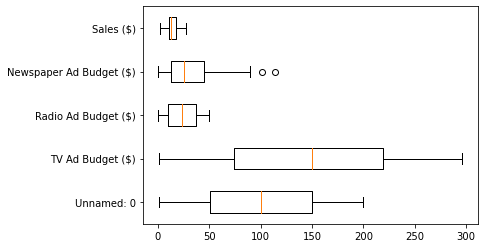

In [15]:
plt.boxplot(df,vert=False,data = df,labels=df.columns)
plt.show()

In [16]:
df[:5]


,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [29]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [30]:
x=df.iloc[:,:-1]
x

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [31]:
y = df.iloc[:,-1:]


In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size=0.3,random_state=43)

In [33]:
xtrain,ytrain


(     TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)
 71              109.8                 14.3                     31.7
 90              134.3                  4.9                      9.3
 100             222.4                  4.3                     49.8
 44               25.1                 25.7                     43.3
 94              107.4                 14.0                     10.9
 ..                ...                  ...                      ...
 58              210.8                 49.6                     37.7
 21              237.4                  5.1                     23.5
 49               66.9                 11.7                     36.8
 64              131.1                 42.8                     28.9
 68              237.4                 27.5                     11.0
 
 [140 rows x 3 columns],
      Sales ($)
 71        12.4
 90        11.2
 100       11.7
 44         8.5
 94        11.5
 ..         ...
 58        23.8
 21        12.5
 

In [34]:
xtest,ytest


(     TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)
 56                7.3                 28.1                     41.4
 37               74.7                 49.4                     45.7
 67              139.3                 14.5                     10.2
 79              116.0                  7.7                     23.1
 80               76.4                 26.7                     22.3
 188             286.0                 13.9                      3.7
 183             287.6                 43.0                     71.8
 10               66.1                  5.8                     24.2
 128             220.3                 49.0                      3.2
 62              239.3                 15.5                     27.3
 65               69.0                  9.3                      0.9
 17              281.4                 39.6                     55.8
 133             219.8                 33.5                     45.1
 195              38.2            

In [35]:
# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression()


In [37]:
model.fit(xtrain,ytrain)

LinearRegression()

In [38]:
ypred=model.predict(xtest)
ypred

array([[ 8.41710143],
       [15.36146115],
       [12.08619274],
       [ 9.75953058],
       [11.37799221],
       [18.73526253],
       [23.94158412],
       [ 7.11931733],
       [22.06606191],
       [16.83172907],
       [ 7.93115903],
       [23.07243791],
       [19.15729792],
       [ 5.47677475],
       [15.42102256],
       [ 9.82205717],
       [12.08023645],
       [ 9.76094922],
       [21.07717663],
       [ 9.13945016],
       [20.36205828],
       [12.03862691],
       [13.78082146],
       [10.73225482],
       [16.20061541],
       [ 7.77042699],
       [20.6251206 ],
       [20.31966315],
       [ 8.97266008],
       [14.13746173],
       [17.28381353],
       [15.13827164],
       [17.18376843],
       [19.03374633],
       [17.13952183],
       [12.14670527],
       [12.7815946 ],
       [ 6.08135492],
       [10.06634988],
       [13.48921606],
       [12.01549843],
       [ 9.70107337],
       [ 5.35398678],
       [10.14966171],
       [14.224196  ],
       [14

In [39]:
model.score(xtrain,ytrain)*100


88.44142326775768

In [40]:
model.score(xtest,ytest)*100


92.20854203535252

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [42]:
mean_squared_error(ytest,ypred)


2.2412862530933464

In [43]:
mean_absolute_error(ytest,ypred)


1.2212299380899396

In [44]:
r2_score(ytest,ypred)*100


92.20854203535252

In [45]:
rmse = np.sqrt(mean_squared_error(ytest,ypred))
rmse


1.4970926000396056

In [46]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold


In [47]:
cv = KFold(n_splits=5,shuffle=True, random_state=0)
cv

KFold(n_splits=5, random_state=0, shuffle=True)

In [50]:
scores=cross_val_score(model,x,y,cv=cv,n_jobs=-1)
finalscore=np.mean(scores)
finalscore

0.8910650514774895

In [51]:
param_grid = {'normalize':['deprecated'],
    'copy_X':[True],
    'n_jobs':[-1,1,2,-2],
    'positive':[False],
    'fit_intercept':[True]
    }

In [52]:
grid_model=GridSearchCV(model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5)
grid_model

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [-1, 1, 2, -2], 'normalize': ['deprecated'],
                         'positive': [False]})

In [53]:
grid_model.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [-1, 1, 2, -2], 'normalize': ['deprecated'],
                         'positive': [False]})

In [54]:
grid_model.estimator

LinearRegression()

In [55]:
grid_model.get_params()


{'cv': 5,
 'error_score': nan,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator': LinearRegression(),
 'n_jobs': -1,
 'param_grid': {'normalize': ['deprecated'],
  'copy_X': [True],
  'n_jobs': [-1, 1, 2, -2],
  'positive': [False],
  'fit_intercept': [True]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [56]:
grid_model.best_params_


{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -1,
 'normalize': 'deprecated',
 'positive': False}

In [57]:
grid_model.best_score_


0.8686758831118258

In [58]:
## RIDGE

from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression(fit_intercept=True,
    normalize='deprecated',
    copy_X=True,
    n_jobs=-1,
    positive=False)

In [59]:
model.fit(xtrain,ytrain)
model.predict(xtest)
model.score(xtrain,ytrain)
model.score(xtest,ytest)

0.9220854203535253

In [60]:
ridgemodel =Ridge()
ridgemodel

Ridge()

In [61]:
param_ridge={
    'alpha' :[1.0,0.01,2,3,0.05,0.07,0.09,0.1,0.3,0.6,0.9],
    'fit_intercept':[True],
    'normalize':['deprecated'],
    'copy_X':[True],
    'max_iter':[1000,2000,5000,10000,13000,15000],
    'tol':[0.001,0.004,0.002,0.003],
    'solver':['auto','saga'],
    'positive':[True],
    'random_state':[0]
}

In [62]:
ridge_model=GridSearchCV(ridgemodel,
    param_grid=param_ridge,
    cv=5)
ridge_model

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.01, 2, 3, 0.05, 0.07, 0.09, 0.1, 0.3,
                                   0.6, 0.9],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 10000, 13000, 15000],
                         'normalize': ['deprecated'], 'positive': [True],
                         'random_state': [0], 'solver': ['auto', 'saga'],
                         'tol': [0.001, 0.004, 0.002, 0.003]})

In [64]:
ridge_model.fit(xtrain,ytrain)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1320 fits failed out of a total of 2640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1320 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py", line 1011, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py", line 712, in fit
    raise ValueError(
ValueError: solver='saga' does not support positive fitting. Please set t

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.01, 2, 3, 0.05, 0.07, 0.09, 0.1, 0.3,
                                   0.6, 0.9],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 10000, 13000, 15000],
                         'normalize': ['deprecated'], 'positive': [True],
                         'random_state': [0], 'solver': ['auto', 'saga'],
                         'tol': [0.001, 0.004, 0.002, 0.003]})

In [65]:
ridgepred = ridge_model.predict(xtest)


In [66]:
ridge_model.score(xtrain,ytrain)


0.8843476252344077

In [67]:
ridge_model.score(xtest,ytest)


0.922305942154056

In [68]:
## LASSO

lasso = Lasso()
lasso.fit(xtrain,ytrain)
lasso.predict(xtest)
lasso.score(xtrain,ytrain)
lasso.score(xtest,ytest)

0.9204771495691686

In [69]:
lasso_grid_para={
    'alpha':[1.0,0.01,0.2,0.3,0.01,0.02],
    'fit_intercept':[True],
    'normalize':['deprecated'],
    'copy_X':[True],
    'max_iter':[1000,2000,5000,7000,10000,13000,15000],
    'positive':[False],
    'random_state':[0],
    'selection':['cyclic']
}

In [70]:
grid_model_lasso=GridSearchCV(lasso,
    param_grid=lasso_grid_para,
    n_jobs=-1,
    cv=5)
grid_model_lasso

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'normalize': ['deprecated'], 'positive': [False],
                         'random_state': [0], 'selection': ['cyclic']})

In [71]:
grid_model_lasso.get_params()


{'cv': 5,
 'error_score': nan,
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 1000,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': Lasso(),
 'n_jobs': -1,
 'param_grid': {'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
  'fit_intercept': [True],
  'normalize': ['deprecated'],
  'copy_X': [True],
  'max_iter': [1000, 2000, 5000, 7000, 10000, 13000, 15000],
  'positive': [False],
  'random_state': [0],
  'selection': ['cyclic']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [72]:
grid_model_lasso.set_params()


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'normalize': ['deprecated'], 'positive': [False],
                         'random_state': [0], 'selection': ['cyclic']})

In [73]:
grid_model_lasso.fit(xtrain,ytrain)
grid_model_lasso.predict(xtest)
grid_model_lasso.score(xtrain,ytrain)
grid_model_lasso.score(xtest,ytest)


0.9204771495691686